# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

- The dataset contains a series of images that can be used to solve the Happy House problem!
- We need to build an artificial neural network that can detect smiling faces.
- Only smiling people will be allowed to enter the house!
- The train set has 600 examples. The test set has 150 examples.
- Data Source: https://www.kaggle.com/iarunava/happy-house-dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import h5py

# STEP #2: IMPORTING DATA

In [5]:
happy_training = h5py.File("/content/train_happy.h5", "r")
happy_testing = h5py.File("/content/test_happy.h5", "r")

In [4]:
for key in happy_training.keys():
  print(key)

list_classes
train_set_x
train_set_y


In [6]:
X_train = np.array(happy_training['train_set_x'][:])
y_train = np.array(happy_training['train_set_y'][:])

X_test = np.array(happy_testing['test_set_x'][:])
y_test = np.array(happy_testing['test_set_y'][:])


In [10]:
X_train.shape

(600, 64, 64, 3)

In [11]:
X_test.shape

(150, 64, 64, 3)

In [12]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

# STEP #3: VISUALIZATION OF THE DATASET  

1


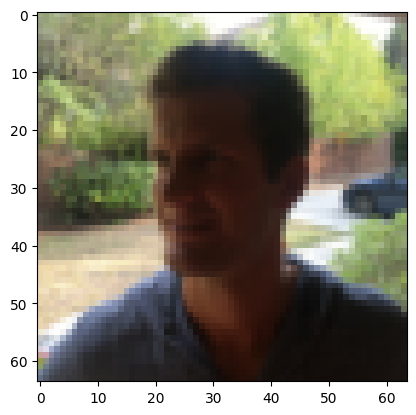

In [16]:
i  = random.randint(1, 600)
print(y_train[i])
plt.imshow(X_train[i])

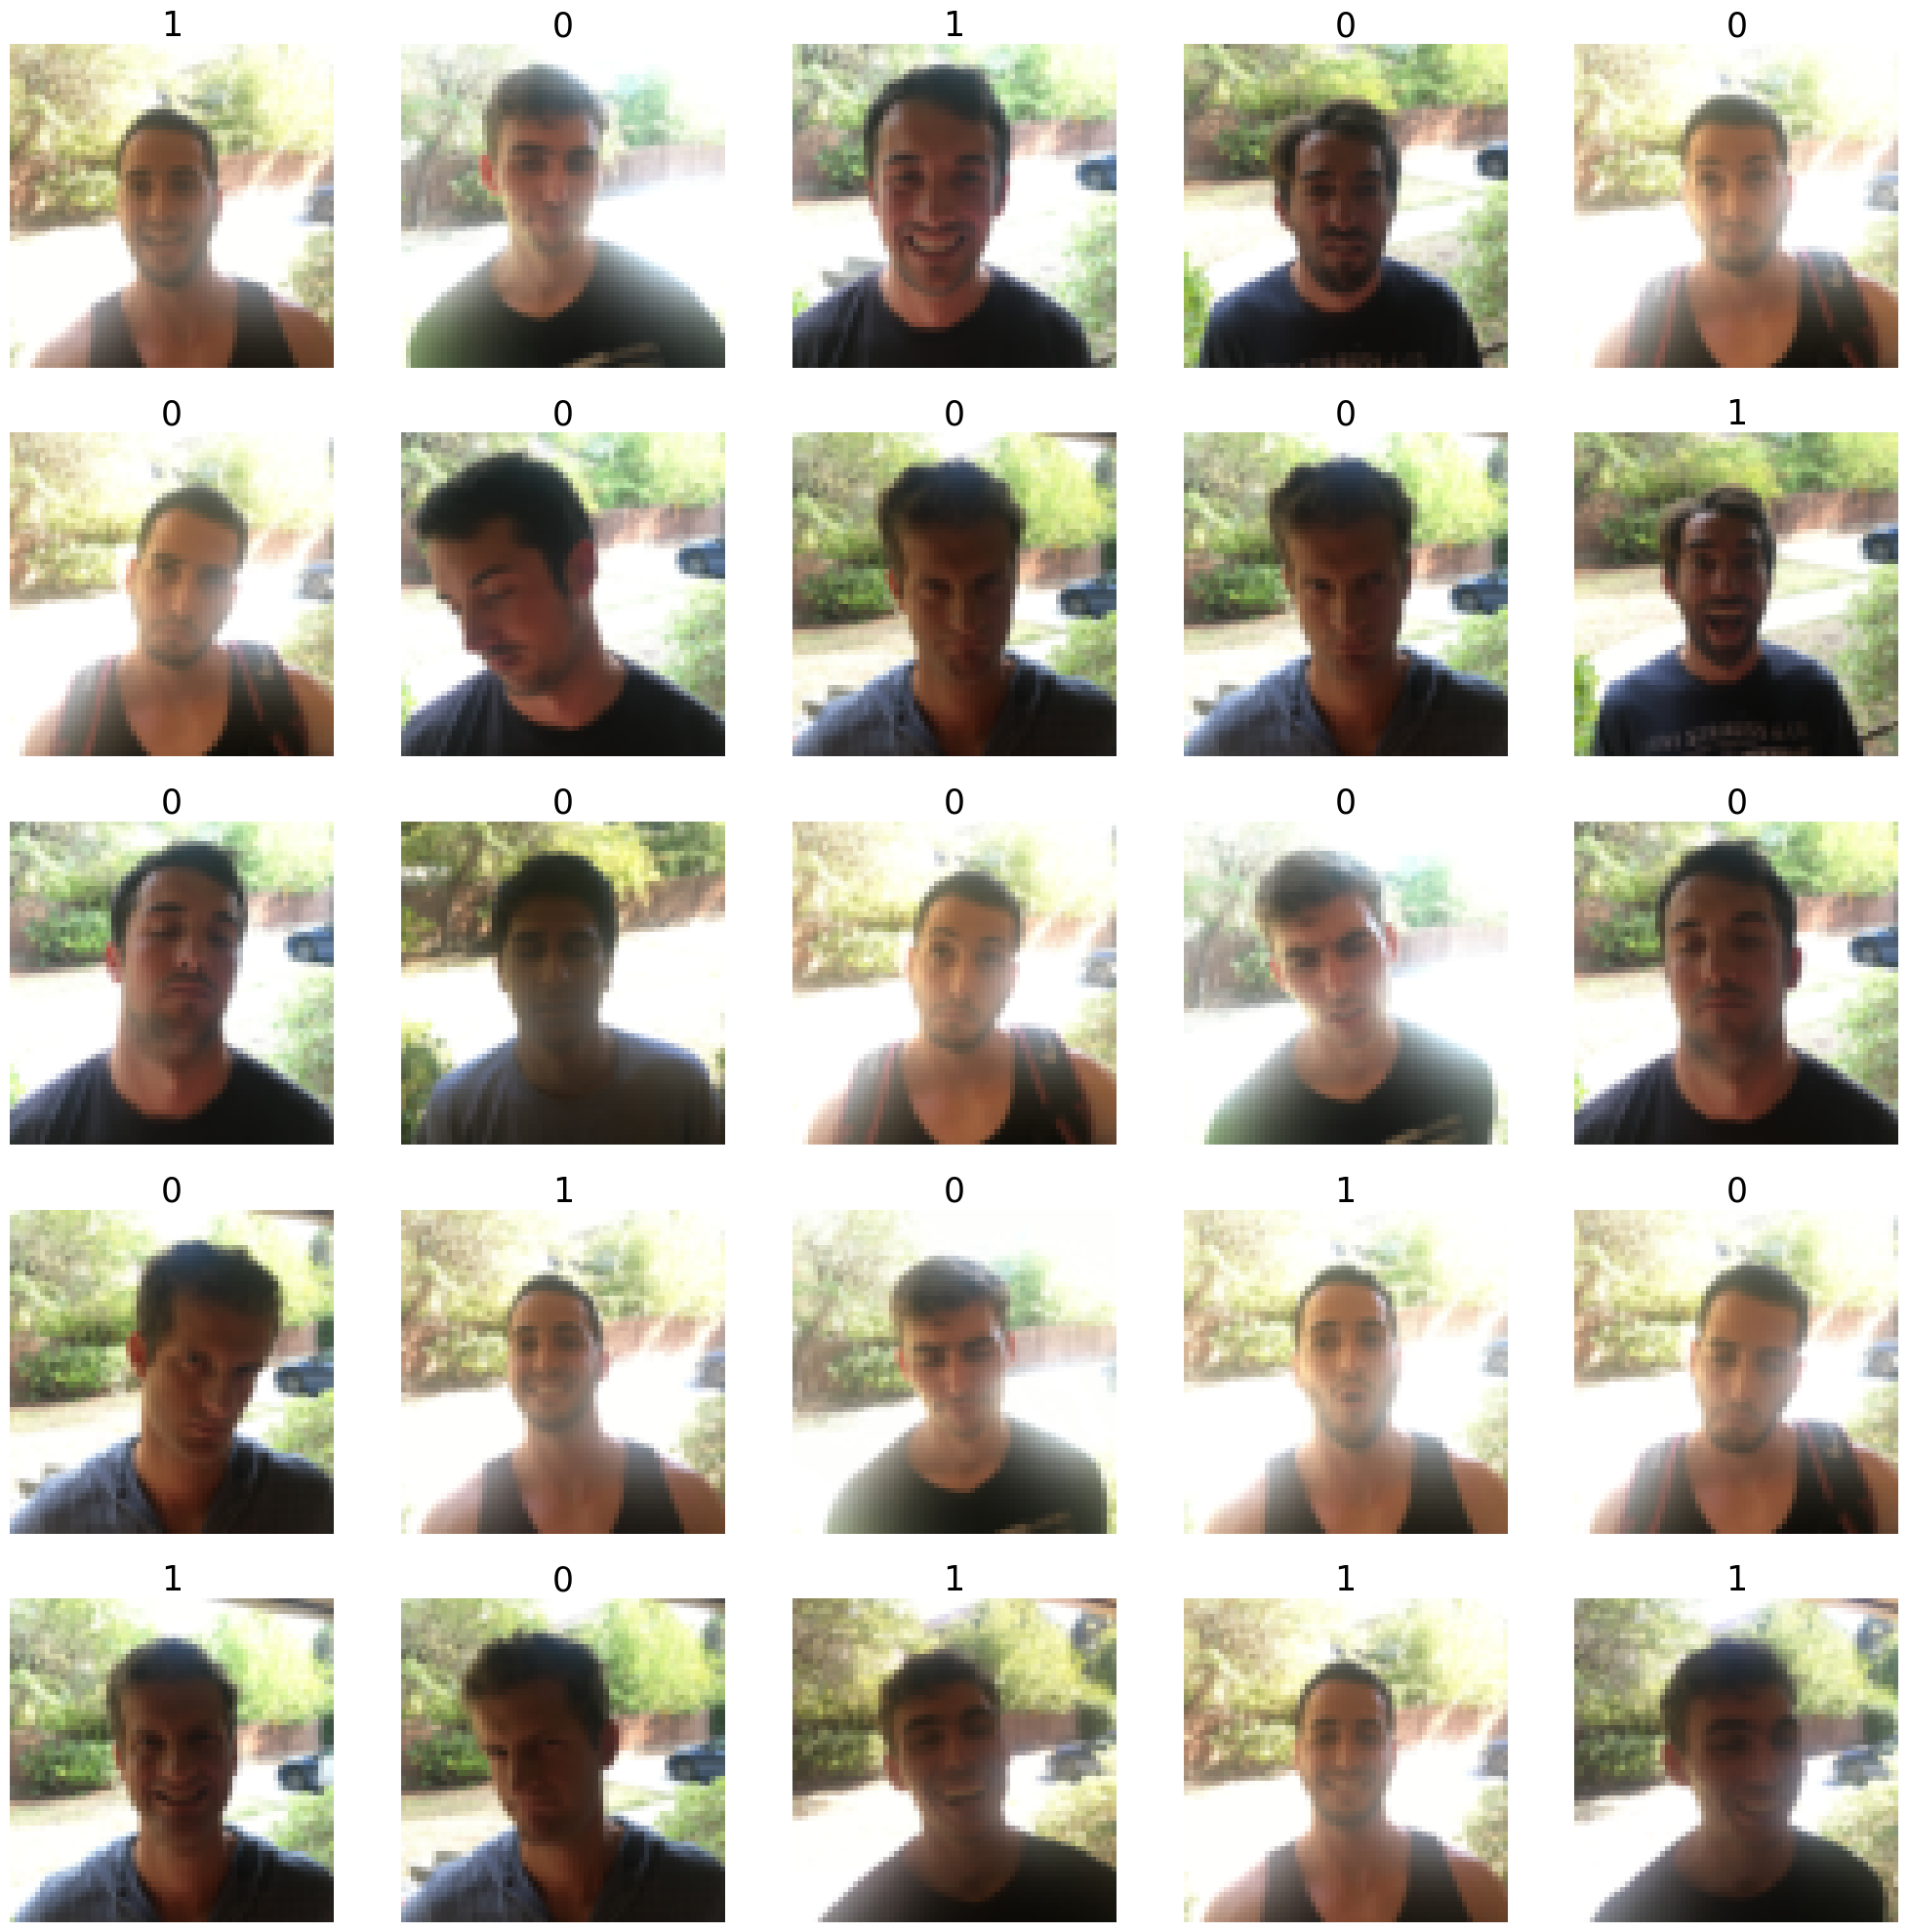

In [17]:
W_grid = 5
L_grid = 5

n_training = len(X_train)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))

axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

# STEP #4: TRAINING THE MODEL

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, (6, 6), input_shape=(64, 64, 3), activation="relu" ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, (6, 6), activation="relu" ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation="relu" ))
cnn_model.add(Dense(units=1, activation="sigmoid" ))


In [24]:
cnn_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate= 0.001), metrics=['accuracy'])

In [36]:
epochs = 10
history = cnn_model.fit(X_train, y_train, batch_size=30, epochs=epochs, verbose=1)

Epoch 1/10
20/20 [==============================] - 11s 573ms/step - loss: 0.0734 - accuracy: 0.9783
Epoch 2/10
20/20 [==============================] - 12s 582ms/step - loss: 0.0574 - accuracy: 0.9850
Epoch 3/10
20/20 [==============================] - 11s 556ms/step - loss: 0.0653 - accuracy: 0.9817
Epoch 4/10
20/20 [==============================] - 11s 530ms/step - loss: 0.0540 - accuracy: 0.9833
Epoch 5/10
20/20 [==============================] - 10s 506ms/step - loss: 0.0565 - accuracy: 0.9850
Epoch 6/10
20/20 [==============================] - 11s 574ms/step - loss: 0.0526 - accuracy: 0.9850
Epoch 7/10
20/20 [==============================] - 11s 562ms/step - loss: 0.0402 - accuracy: 0.9900
Epoch 8/10
20/20 [==============================] - 11s 546ms/step - loss: 0.0436 - accuracy: 0.9833
Epoch 9/10
20/20 [==============================] - 10s 477ms/step - loss: 0.0332 - accuracy: 0.9917
Epoch 10/10
20/20 [==============================] - 11s 512ms/step - loss: 0.0332 - accura

# STEP #5: EVALUATING THE MODEL

In [43]:
y_pred_prob = cnn_model.predict(X_test)
predicted_classes = np.round(y_pred_prob)

5/5 [==============================] - 1s 132ms/step


<Axes: >

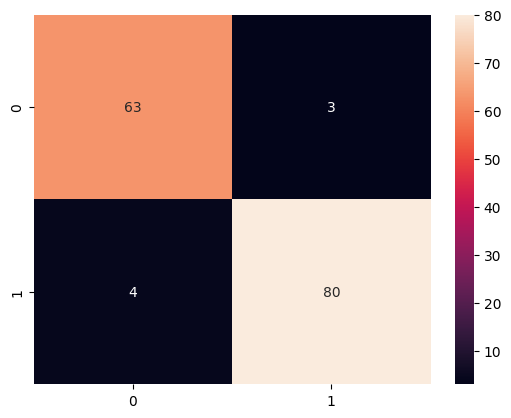

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot = True)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.96      0.95      0.96        84

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



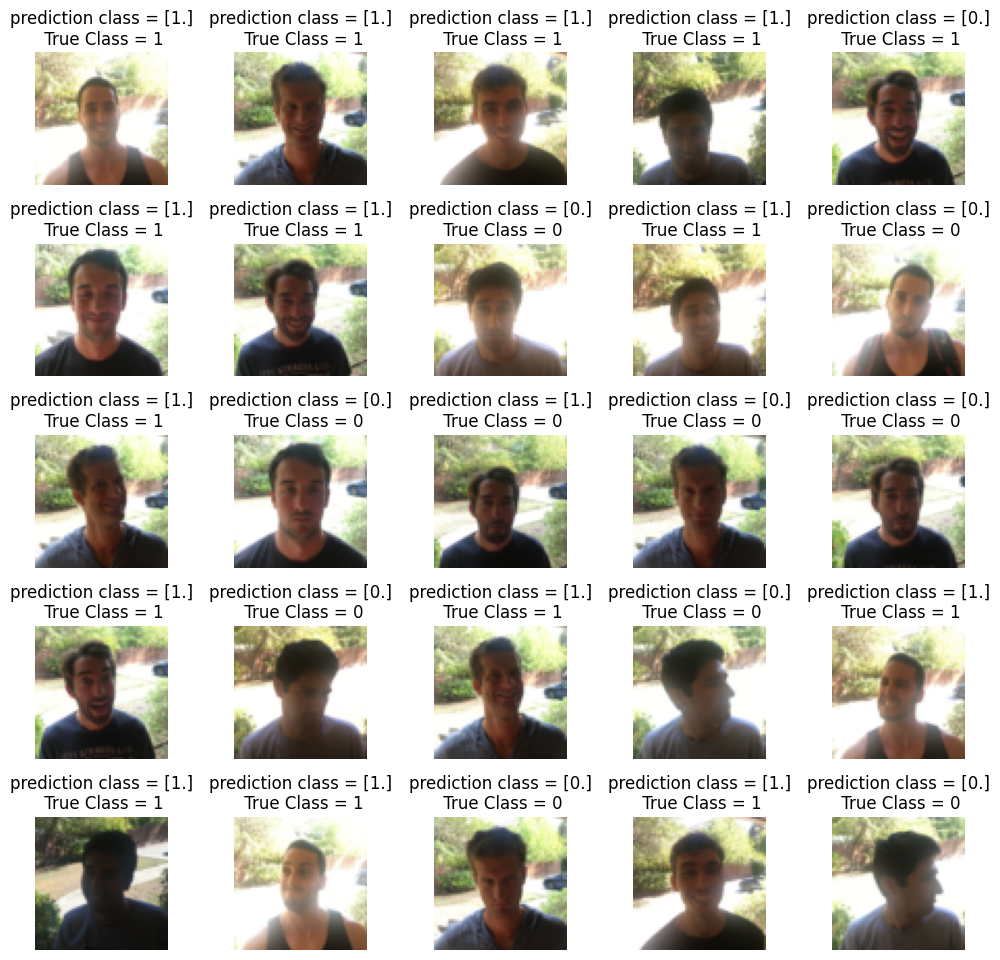

In [46]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction class = {}\n True Class = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)